In [1]:
# import basic LIB
import pandas as pd
import numpy as np
# Visualization LIB
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation LIB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# DeepLearning LIB
import tensorflow as ts
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:

(x_train_digit,y_train_digit),(x_test_digit,y_test_digit)=mnist.load_data()

In [3]:
x_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train_digit


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
x_test_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

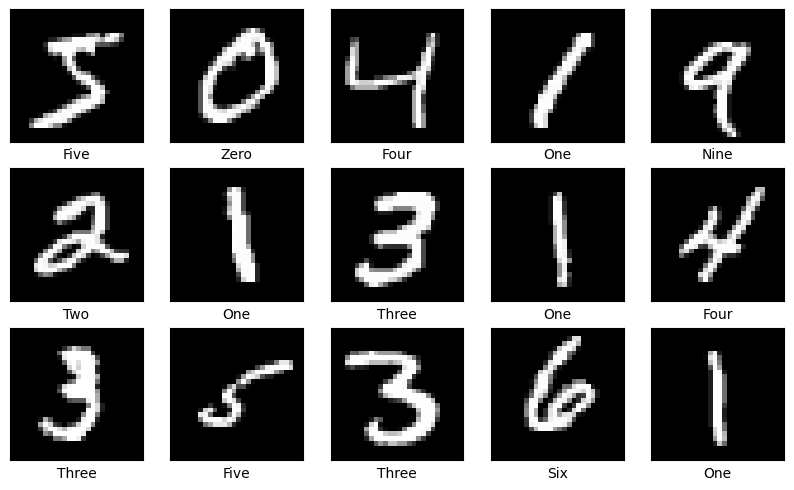

In [8]:
col_names=[ 'Zero','One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven','Eight','Nine']

#Visuvalizing the digits
plt.figure(figsize=(10,10))
for i in range (15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_digit[i],cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()
    

In [9]:
x_train_digit.shape

(60000, 28, 28)

In [10]:
x_train_digit=x_train_digit.reshape(60000,784)
x_test_digit=x_test_digit.reshape(10000,784)

In [11]:
x_train_digit.shape

(60000, 784)

In [12]:
x_test_digit.shape

(10000, 784)

In [13]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [14]:
y_train_digit=to_categorical(y_train_digit,num_classes=10)
y_test_digit=to_categorical(y_test_digit,num_classes=10)

In [15]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
y_test_digit.shape

(10000, 10)

In [17]:
# Creating Base Nural Network
model= keras.Sequential([
    layers.Dense(256,activation='relu',input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
    
])

In [18]:
# param_number = output_channel_number * (input_channel_number + 1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [19]:
# compiling the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
#y_train_encoded = ts.keras.utils.to_categorical(y_train_digit, num_classes=10)

In [21]:
history = model.fit(x_train_digit, y_train_digit, batch_size=100, epochs=10, validation_data=(x_train_digit, y_train_digit))



Epoch 1/10
600/600 [==============================] - 8s 11ms/step - loss: 1.2066 - accuracy: 0.8455 - val_loss: 0.2905 - val_accuracy: 0.9184
Epoch 2/10
600/600 [==============================] - 7s 11ms/step - loss: 0.2566 - accuracy: 0.9309 - val_loss: 0.2020 - val_accuracy: 0.9437
Epoch 3/10
600/600 [==============================] - 6s 10ms/step - loss: 0.1823 - accuracy: 0.9498 - val_loss: 0.1487 - val_accuracy: 0.9550
Epoch 4/10
600/600 [==============================] - 6s 10ms/step - loss: 0.1496 - accuracy: 0.9577 - val_loss: 0.1165 - val_accuracy: 0.9645
Epoch 5/10
600/600 [==============================] - 6s 10ms/step - loss: 0.1381 - accuracy: 0.9609 - val_loss: 0.1348 - val_accuracy: 0.9590
Epoch 6/10
600/600 [==============================] - 6s 10ms/step - loss: 0.1182 - accuracy: 0.9661 - val_loss: 0.1094 - val_accuracy: 0.9683
Epoch 7/10
600/600 [==============================] - 6s 10ms/step - loss: 0.1104 - accuracy: 0.9693 - val_loss: 0.1192 - val_accuracy: 0.9658

In [22]:
test_loss_digit, test_acc_digit = model.evaluate(x_test_digit, y_test_digit)

313/313 [==============================] - 2s 4ms/step - loss: 0.1467 - accuracy: 0.9654


In [23]:
print('Digit MNIST Test accuracy:', round(test_acc_digit,4))

Digit MNIST Test accuracy: 0.9654


In [24]:
#Predicting the labels-DIGIT
y_predict = model.predict(x_test_digit)

313/313 [==============================] - 1s 3ms/step


In [25]:
y_predict[0]

array([0.3012988 , 0.9999205 , 1.        , 1.        , 0.17029576,
       0.00115582, 0.77454364, 1.        , 0.99991196, 0.98841363],
      dtype=float32)

In [26]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector


In [27]:
y_predicts

array([2, 2, 1, ..., 2, 0, 5], dtype=int64)

In [28]:
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [29]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [33]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


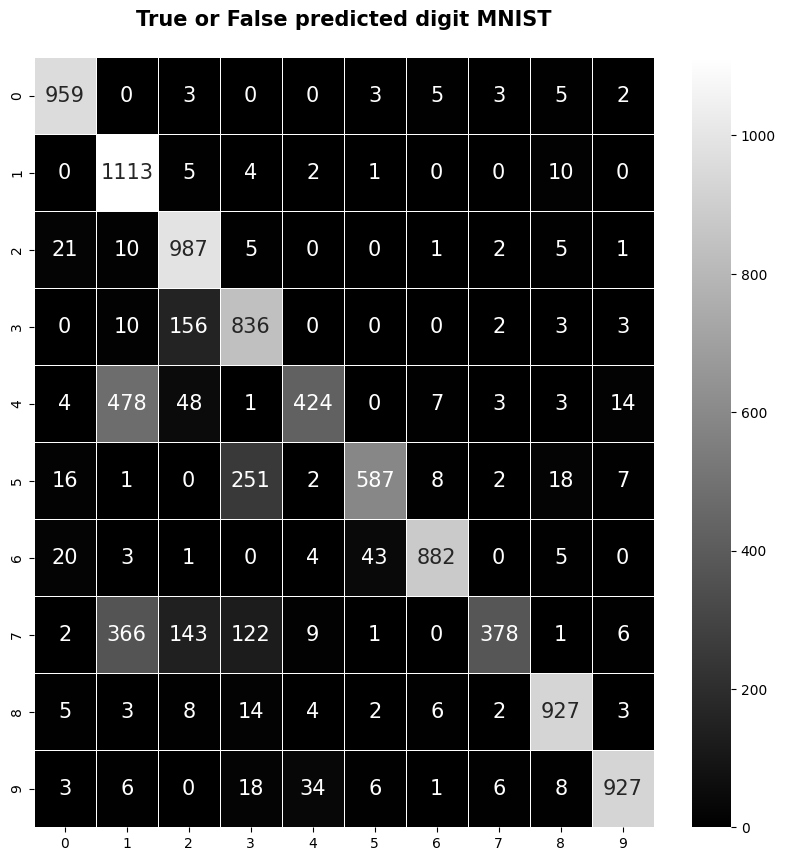

In [34]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       980
           1       0.56      0.98      0.71      1135
           2       0.73      0.96      0.83      1032
           3       0.67      0.83      0.74      1010
           4       0.89      0.43      0.58       982
           5       0.91      0.66      0.76       892
           6       0.97      0.92      0.94       958
           7       0.95      0.37      0.53      1028
           8       0.94      0.95      0.95       974
           9       0.96      0.92      0.94      1009

    accuracy                           0.80     10000
   macro avg       0.85      0.80      0.79     10000
weighted avg       0.85      0.80      0.79     10000



In [36]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


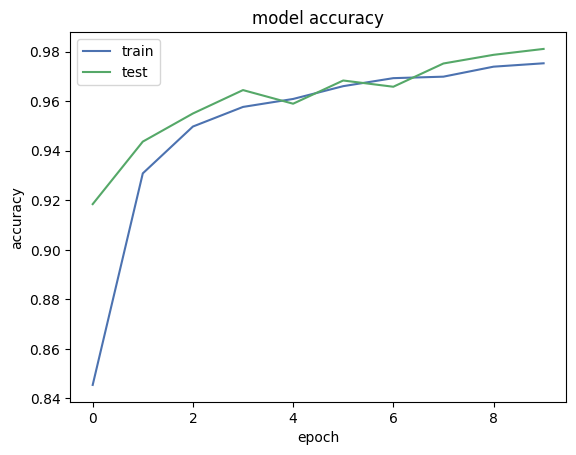

In [37]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

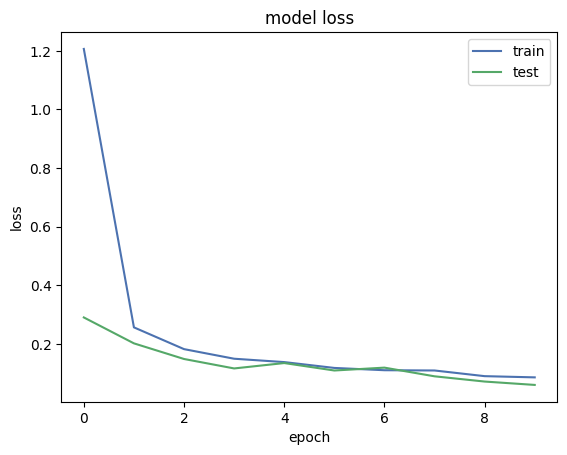

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [40]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(x_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 [==============================] - 0s 58ms/step


In [43]:
y_predicts_single[0]

1

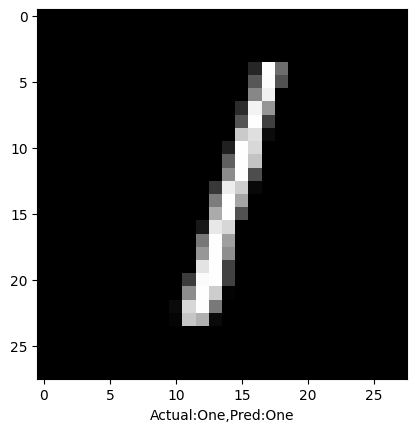

In [45]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(x_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()

In [46]:
y_test_digit[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)